<a href="https://colab.research.google.com/github/semkud/nnmethods/blob/main/nnmethods_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Откроем датасет, посмотрим, как он устроен

In [1]:
import pandas as pd
table = pd.read_csv('Shoes_Data.csv')
print(table)

                                                  title  ... Shoe Type
0       CLYMB Outdoor Sports Running Shoes for Mens Boy  ...       Men
1                 Bourge Men's Loire-z126 Running Shoes  ...       Men
2                                  T-Rock Men's Sneaker  ...       Men
3     Robbie jones Sneakers Casual Canvas Fabric Col...  ...       Men
4                          Sparx Men's Sd0323g Sneakers  ...       Men
...                                                 ...  ...       ...
1225              Nike Men's React Vision Running Shoes  ...     Women
1226     Puma Men's B.O.G Limitless Hi Evoknit Sneakers  ...     Women
1227  new balance Women's FuelCell Echolucent Runnin...  ...     Women
1228  Nike Women's WMNS Air Zoom Pegasus 37 Running ...  ...     Women
1229      ASICS Women Gt-2000 7 Lite-Show Running Shoes  ...     Women

[1230 rows x 8 columns]


In [2]:
table = table.drop_duplicates(subset=None, keep='first', inplace=False)
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015 entries, 0 to 1197
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1015 non-null   object
 1   price                1015 non-null   object
 2   rating               1015 non-null   object
 3   total_reviews        1015 non-null   object
 4   product_description  1015 non-null   object
 5   reviews              1015 non-null   object
 6   reviews_rating       1015 non-null   object
 7   Shoe Type            1015 non-null   object
dtypes: object(8)
memory usage: 71.4+ KB


Опа, убрали 115 повторений. В таблице нет пустых значений.



Посмотрим, что лежит в таблице:

In [3]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)
table.head()

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men


Получается

1) в названии написана фирма и название модели
\
2) цену надо очистить от знака валюты - это целевая переменная
\
3) рейтинг перевести из строки в число
\
4) общее число отзывов нам не интересно
\
5) описание продукта - то, что мы будем главным образом использовать при обучении, к нему будем применять главный препроцессинг
\
6) отзывы и рейтинги отзывов - пока выкидываем, для второй части задания только они и понадобятся
\
7) тип обуви - переведем в числовой формат


Почистим столбцы в соответствии с планом и оставим только нужные:



In [4]:
cleantable = pd.DataFrame()
cleantable['title'] = [str(x).lower() for x in table['title']]
cleantable['price'] = [float(x[1::]) for x in table['price']]
cleantable['rating'] = [float(x[0:3]) for x in table['rating']]
cleantable['desc'] = [str(x).lower() for x in table['product_description']]
sex = []
for x in table['Shoe Type']:
  if x == 'Men':
    sex.append(1)
  else:
    sex.append(0)
cleantable['sex'] = sex
cleantable.head()

,title,price,rating,desc,sex
0,clymb outdoor sports running shoes for mens boy,279.0,2.9,elevate your style with this classy pair of ru...,1
1,bourge men's loire-z126 running shoes,479.0,3.9,the product will be an excellent pick for you....,1
2,t-rock men's sneaker,430.0,3.3,flaunt with these stylish and unique red casua...,1
3,robbie jones sneakers casual canvas fabric col...,499.0,4.2,robbie jones shoes are designed to keeping in ...,1
4,sparx men's sd0323g sneakers,499.0,4.2,sparx is a spectacular range of footwear from ...,1


In [5]:
cleantable.info() #Здесь я не уверен, норм ли, что секс - инт, а остальное флоат. Мб сделать секс тоже флоатом? Или вообще сделать one-hot колонку из него..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   1015 non-null   object 
 1   price   1015 non-null   float64
 2   rating  1015 non-null   float64
 3   desc    1015 non-null   object 
 4   sex     1015 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 39.8+ KB


Посмотрим, какие бывают значения в колонках:

In [6]:
cleantable.describe(include='all')

,title,price,rating,desc,sex
count,1015,1015.000000,1015.000000,1015,1015.000000
unique,902,NaN,NaN,715,NaN
top,adidas men running shoes,NaN,NaN,the product will be an excellent pick for you....,NaN
freq,7,NaN,NaN,27,NaN
mean,NaN,1789.546788,3.941379,NaN,0.794089
...,...,...,...,...,...
min,NaN,127.000000,1.000000,NaN,0.000000
25%,NaN,569.000000,3.800000,NaN,1.000000
50%,NaN,1399.000000,4.000000,NaN,1.000000
75%,NaN,2403.500000,4.200000,NaN,1.000000


Мы наблюдаем цену от 127 до почти 8000, при этом половина товаров дешевле 1400, а 3/4 товаров дешевле 2403. Соответственно горб распределения смещен влево, на промежуток от 2400 до 8000 приходится всего четверть товаров.

Из 1015 строк наименований, только 902 уникальных. Значит, какие-то повторяются. Самое частотное тут - 'red tape men's formal shoes'. Поскольку все дубликаты мы выкинули, из этого следует, что такое название применяется к разным моделям с разной ценой. Пока запомним, позже решим, что с этим делать.

Средний рейтинг товаров 3.94. Интересно посмотреть на корреляцию между рейтингом и ценой.

По типу обуви на 4 мужские модели приходится 1 женская. Интересно, по разному ли они стоят.

Описание. Здесь ситуация намного хуже. Только 715 уникальных описаний. Учитывая, что мы хотим по описанию предсказывать цену, выходит грустно. Давайте посмотрим на подтаблицу, где описание одно из самых частотных:

In [7]:
cleantable[cleantable['desc'] == 'the product will be an excellent pick for you. it ensures an easy maintenance.']

,title,price,rating,desc,sex
1,bourge men's loire-z126 running shoes,479.0,3.9,the product will be an excellent pick for you....,1
29,sparx men's sd0631g casual shoes,438.0,4.2,the product will be an excellent pick for you....,1
93,sparx men's sm-402 sneakers,374.0,4.1,the product will be an excellent pick for you....,1
143,campus men's rodeo-2 running sport shoe,699.0,4.0,the product will be an excellent pick for you....,1
160,sparx men's sd0631g casual shoes,438.0,4.2,the product will be an excellent pick for you....,1
...,...,...,...,...,...
411,puma men's flex free xt idp running shoes,1649.0,3.8,the product will be an excellent pick for you....,1
459,adidas men's glick m running shoes,1972.0,4.1,the product will be an excellent pick for you....,1
543,adidas men's drogo m running shoes,1080.0,4.1,the product will be an excellent pick for you....,1
599,campus men's styger running shoes,1399.0,4.0,the product will be an excellent pick for you....,1


In [8]:
cleantable[cleantable['desc'] == 'the product will be an excellent pick for you. it ensures an easy maintenance.'].describe()

,price,rating,sex
count,27.000000,27.000000,27.000000
mean,795.925926,4.011111,0.962963
std,383.493749,0.128103,0.192450
min,374.000000,3.800000,0.000000
25%,569.000000,3.900000,1.000000
50%,679.000000,4.000000,1.000000
75%,897.500000,4.100000,1.000000
max,1972.000000,4.200000,1.000000


Окей, мы видим одно и то же описание у совершенно разных товаров. С ценой от 374 до до 1972 (в такой разброс помещаются больше половины всех товаров), с рейтингом от 3.8 до 4.2, в основном мужские.

Это плохо, давайте прикинем на сколько плохо.
У нас 1000 товаров, у 30 одному и тому же описанию соответствует разная цена.  Как минимум 3% этих данных просто вредны, они вносят сумятицу.
И это мы еще не сказали про то, что в большой таблице только 715 оригинальных описания. То есть у 400 из 1100 описаний может быть "неоднозначное" решение по цене, которое не будет полезно для обучения модели.


Безусловно, после того, как мы выкинули из таблицы дубликаты - каждая строчка уникальна, то есть сочетанию наименование + описание + рейтинг + пол -> цена соответствует одна строчка. Но можно ли натренировать модель так, чтобы по слову "дрого" в описании она давал цену 1080 (строчка 543), а если при прочих равных вместо этого слова будет "глик" 1972 (строчка 459)?


Выбирая между тем, чтобы взять все данные и построить ожидаемо плохую модель, или взять 60% данных, и построить перспективную модель, которую еще надо проверить, я останавливаюсь на втором варианте.
\
Однако, чтобы проверить свою интуицию, ожидаемо плохую модель мы тоже построим

AxesSubplot(0.125,0.125;0.775x0.755)


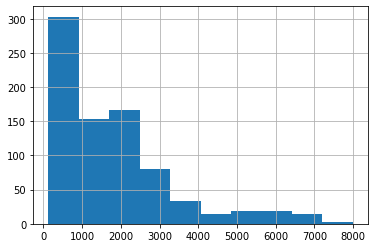

In [9]:
print(cleantable[cleantable['sex'] == 1]['price'].hist()) #Видим, что большинство мужской обуви стоят до 2500

AxesSubplot(0.125,0.125;0.775x0.755)


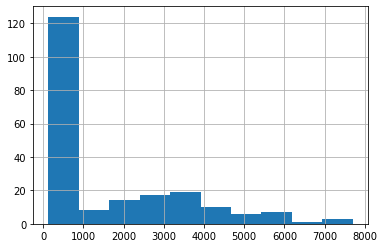

In [10]:
print(cleantable[cleantable['sex'] == 0]['price'].hist()) #А женская обувь в целом дешевле, здесь большинство до 1000

AxesSubplot(0.125,0.125;0.775x0.755)


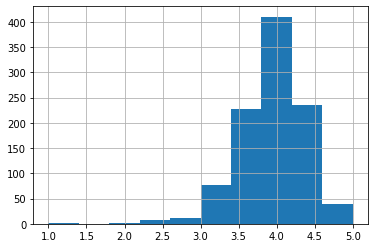

In [11]:
print(cleantable['rating'].hist()) #Средняя оценка 3.94

In [12]:
cleantable.corr() # у оценки и цены есть небольшая корреляция

,price,rating,sex
price,1.000000,0.280056,0.02383
rating,0.280056,1.000000,-0.09978
sex,0.023830,-0.099780,1.00000


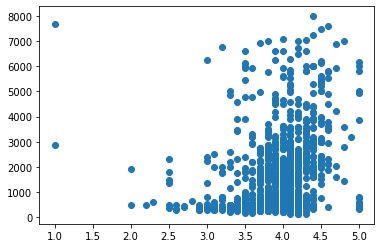

In [13]:
import matplotlib.pyplot as plt
plt.scatter(cleantable['rating'], cleantable['price'], marker='o'); #Оценки до 3 можно пересчитать по пальцам. 5 получили или очень дешевые или очень дрогие товары

Избавимся сейчас от дубликатов в описаниях, создадим новую таблицу clean2table

In [14]:
clean2table = cleantable.drop_duplicates(subset='desc', keep = 'first') #Это тоже дискуссионный шаг, непонятно, почему мы оставляем первое вхождение.
#Возможно было бы даже лучше оставить не какое-то вхождение, а добавить псевдоданные, где каждому описанию, которое повторилось,
#Соответствовала средняя цена для этих повторений
clean2table.shape

(715, 5)

Векторизуем тексты. И заголовки, и описания, и для cleantable, и для clean2table
Мы отдельно векторизуем заголовки и описания, потому что в заголовках встречается намного меньше слов и они намного более весомы. Так может упоминаться дорогой бренд или дешевый, повседневый вариант или премиальный

In [15]:
from nltk.tokenize import wordpunct_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer


tokenizer = RegexpTokenizer(r'\w+')
stops = stopwords.words("english")

tfidf = TfidfVectorizer(
    analyzer="word",
    stop_words=stops)

def lemmatize_column(column):
  lemmatize = []
  for text in column:
      #tokenization = nltk.word_tokenize(text)

      tokenization=tokenizer.tokenize(text.lower())
      lm = ''
      for word in tokenization:
        flag=0
        for alpha in word:
          if alpha not in 'abcdefghijklmnopqrstuvwxyz1234567890-': #В названии модели могут быть числа
            flag = 1
        lemma = wordnet_lemmatizer.lemmatize(word)
        if lemma in stops:
          flag = 1
        if flag == 0:
          lm = lm+' '+ str(lemma)
      lemmatize.append(lm)
  return lemmatize

desc1 = lemmatize_column(cleantable['desc'])
title1 = lemmatize_column(cleantable['title'])
desc2 = lemmatize_column(clean2table['desc'])
title2 = lemmatize_column(clean2table['title'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
print(len(desc1), len(title1), cleantable.shape)
print(len(desc2), len(title2), clean2table.shape)

1015 1015 (1015, 5)
715 715 (715, 5)


In [17]:
vectorizer_d = CountVectorizer(min_df=5, max_df=0.4) #Будем использовать разные векторайзеры для описаний и наименований
vectorizer_t = CountVectorizer(max_df=0.4) #Здесь не будем отрезать по нижней границе частотности

title1_vec = pd.DataFrame(vectorizer_t.fit_transform(title1).toarray(), columns = vectorizer_t.get_feature_names())
desc1_vec = pd.DataFrame(vectorizer_d.fit_transform(desc1).toarray()) #здесь не указываю имена колонок, чтобы не было повторений по словам с первой таблицей

title2_vec = pd.DataFrame(vectorizer_t.fit_transform(title2).toarray(), columns = vectorizer_t.get_feature_names())
desc2_vec = pd.DataFrame(vectorizer_d.fit_transform(desc2).toarray())

data1 = title1_vec.join(desc1_vec).join(cleantable['sex']).join(cleantable['rating'])
data2 = title2_vec.join(desc2_vec).join(clean2table['sex']).join(clean2table['rating'])


In [18]:
print(set(cleantable['sex']), set(clean2table['sex']))
print(len(title1_vec), len(desc1_vec), len(cleantable['sex']), len(cleantable['rating']))
print(len(title2_vec), len(desc2_vec), len(clean2table['sex']), len(clean2table['rating']))
print(set(data1['sex']), set(data2['sex']))  #Я не понимаю, откуда в таблице дата2 берутся наны((((( Дальше работаем только с дата1

{0, 1} {0, 1}
1015 1015 1015 1015
715 715 715 715
{0, 1} {nan, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

Переходим к машинному обучению. Используем две модели - Ридж и Лассо. Сделаем гридсерч по гипермараметру альфа.

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[1,10,100]}
model = Ridge()
Ridge_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)
Ridge_reg.fit(data1, cleantable['price'])
print('Для всех данных лучшая модель Риджа: \n', Ridge_reg.best_estimator_)


parameters = {'alpha':[1, 10,100]}
model = Lasso()
Lasso_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)
Lasso_reg.fit(data1, cleantable['price'])
print('Для всех данных лучшая модель Лассо: \n' , Lasso_reg.best_estimator_)





Для всех данных лучшая модель Риджа: 
 Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 427161.15866823494, tolerance: 204422.35068721927
  positive)


Для всех данных лучшая модель Лассо: 
 Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(data1, cleantable['price'])
regressor = Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
np.sqrt(mean_squared_error(y_test, preds))

1005.6666450791818

Ошибаемся в среднем на 1000! Это дофига!
Но к сожалению это данные с дублями, а данные без дублей у нас зафакапились по неизвестной причине...
Попробуем нарисовать график того, что у нас получилось

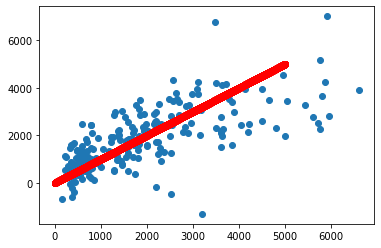

In [21]:
gr_x = y_test.tolist()
gr_y = preds.tolist()
plt.scatter(gr_x, gr_y, marker='o')
plt.scatter(range(0,5000,1), range(0,5000,1), color = 'red')

Если синяя точка отклоняется от красной линии вверх, то мы переборщили, если вниз, то не добрали. Как мы видим, мы ошибаемся вверх на маленьких ценах и начиная с 3000 чаще ошибаемся вниз

Может быть вообще имело смысл отбросить все данные по цене больше 2400, чтобы не запутывать модель... Интересно будет послушать мнение проверяющих

In [22]:
regressor = Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
np.sqrt(mean_squared_error(y_test, preds))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233458.10482221842, tolerance: 197594.9939857556
  positive)


1072.8735944890766

Лассо выдает примерно такую же точность

Посчитаем r2_score:

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

0.4233358408386855

Ну хотя бы больше 0 )))

Давайте теперь используем tf-idf vectorizer и перейдем ко второй части


In [24]:
tfidf = TfidfVectorizer(max_df=0.4)

In [25]:
title1_tfidf = pd.DataFrame(tfidf.fit_transform(title1).toarray())
desc1_tfidf = pd.DataFrame(tfidf.fit_transform(desc1).toarray(), columns = tfidf.get_feature_names())
title2_tfidf = pd.DataFrame(tfidf.fit_transform(title2).toarray())
desc2_tfidf = pd.DataFrame(tfidf.fit_transform(desc2).toarray(), columns = tfidf.get_feature_names())

In [26]:
data1_tfidf = title1_tfidf.join(desc1_tfidf).join(cleantable['sex']).join(cleantable['rating'])
data2_tfidf = title2_tfidf.join(desc2_tfidf).join(clean2table['sex']).join(clean2table['rating'])

In [27]:
print(set(data1_tfidf['sex']), set(data2_tfidf['sex'])) #Здесь тоже сломалось почему-то, продолжаем с data1_tfidf

{0, 1} {nan, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[1,10,100]}
model = Ridge()
Ridge_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)
Ridge_reg.fit(data1_tfidf, cleantable['price'])
print('Для всех данных лучшая модель Риджа: \n', Ridge_reg.best_estimator_)


parameters = {'alpha':[1, 10,100]}
model = Lasso()
Lasso_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)
Lasso_reg.fit(data1, cleantable['price'])
print('Для всех данных лучшая модель Лассо: \n' , Lasso_reg.best_estimator_)

Для всех данных лучшая модель Риджа: 
 Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 427161.15866823494, tolerance: 204422.35068721927
  positive)


Для всех данных лучшая модель Лассо: 
 Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(data1_tfidf, cleantable['price'])
regressor = Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
np.sqrt(mean_squared_error(y_test, preds))

986.1977817685433

974! Уже не за 1000, приятно

In [30]:
regressor = Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
np.sqrt(mean_squared_error(y_test, preds))

1053.7151495667154

Лассо дает ошибку на 100 меньше чем для каунтвекторайзера. Посмотрим график:

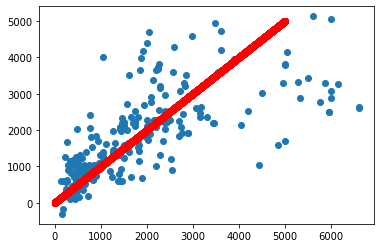

In [31]:
gr_x = y_test.tolist()
gr_y = preds.tolist()
plt.scatter(gr_x, gr_y, marker='o')
plt.scatter(range(0,5000,1), range(0,5000,1), color = 'red')

Все аналогично, в маленьких ценах чаще ошибаемся вверх, в больших вниз

# Часть 2

In [32]:
reviews = []
ratings = []
for line in table['reviews']:
  reviews += line.split('||')
for line in table['reviews_rating']:
  ratings += line.split('||')
  

In [33]:
len(reviews) - len(ratings) #отлично, совпадает

0

In [34]:
import re
ratings_clean = []
for r in ratings:
  ratings_clean.append(int(re.search(r'\d', r).group(0)))

Поскольку отзывы очень короткие, попробуем модифицировать фунцкию лемматизации, разрешив использование стопслов, чтобы не потерять важную информацию типа отрицания

In [35]:
def lemmatize_column(column):
  lemmatize = []
  for text in column:
      #tokenization = nltk.word_tokenize(text)

      tokenization=tokenizer.tokenize(text.lower())
      lm = ''
      for word in tokenization:
        flag=0
        for alpha in word:
          if alpha not in 'abcdefghijklmnopqrstuvwxyz1234567890-': #В названии модели могут быть числа
            flag = 1
        lemma = wordnet_lemmatizer.lemmatize(word)
        if flag == 0:
          lm = lm+' '+ str(lemma)
      lemmatize.append(lm)
  return lemmatize

In [36]:
reviews_clean = lemmatize_column(reviews)
print(reviews[0:10])
print(reviews_clean[0:10])

['Not happy with product', " It's not as expected.", ' AVERAGE PRODUCT', ' Pic more beautiful', ' Got damage product. But quality is average for 300₹', ' Bad product different from what was listed', ' Worst product', " Don't buy", ' Low quality makes pain on heals by sharp edges inside shoes', ' Do not buy it anyway']
[' not happy with product', ' it s not a expected', ' average product', ' pic more beautiful', ' got damage product but quality is average for 300', ' bad product different from what wa listed', ' worst product', ' don t buy', ' low quality make pain on heals by sharp edge inside shoe', ' do not buy it anyway']


Учитывая, что в первой части tfidf справился лучше, здесь тоже будем использовать его

In [37]:
reviews_tfidf = pd.DataFrame(tfidf.fit_transform(reviews_clean).toarray(), columns = tfidf.get_feature_names())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f353aac8dd0>]],
      dtype=object)

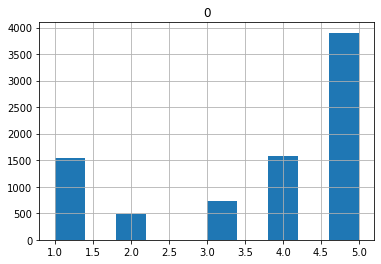

In [38]:
pd.DataFrame(ratings_clean).hist()

Как мы видим, данные очень несбалансированы и, как это ожидаемо бывает в отзывах, - наиболее представлены полярные оценки. Важно будет определять, где 5, а где 1

В качестве алгоритмов будем использовать Логистическую регрессию, Метод к-ближайших соседей и Случайный лес

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
clf = GridSearchCV(model, param_grid, cv=3)
clf.fit(reviews_tfidf, ratings_clean)
print('Для всех данных лучшая модель Логистической регрессии: \n', clf.best_estimator_)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Для всех данных лучшая модель Логистической регрессии: 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(reviews_tfidf, ratings_clean)

mod = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

mod.fit(reviews_tfidf, ratings_clean)
pred = mod.predict(X_test)

In [41]:
from sklearn.metrics import *
acc = accuracy_score(pred, y_test)
micro_f1 = f1_score(pred, y_test, average = 'micro')
micro_p = precision_score(pred, y_test, average = 'micro')
micro_r = recall_score(pred, y_test, average = 'micro')
macro_f1 = f1_score(pred, y_test, average = 'macro')
macro_p = precision_score(pred, y_test, average = 'macro')
macro_r = recall_score(pred, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.6662
micro F1=0.6662, micro P=0.6662, micro R=0.6662
macro F1=0.4588, macro P=0.4503, macro R=0.6229



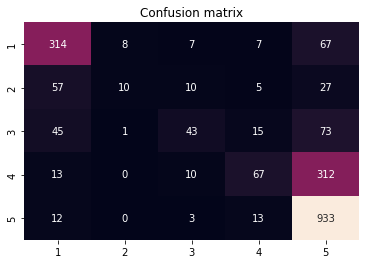

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(data=confusion_matrix(y_test, pred), annot=True, fmt="d", cbar=False, xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
plt.title("Confusion matrix")
plt.show()

Модель неплохо справляется с определением оценок на 1 и 5, при этом часто ошибается ставя оценку 5 отзывам на 4. Все между ними - 2, 3, 4 для модели в целом безразличны.. Это можно было ожидать, рассматривая изначальное распределение оценок. Заметим также, что модель угадала только 2 

Пробуем модель к-ближайших соседей:

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier()
param_grid = {"n_neighbors": [5,7,9,11]}
clf = GridSearchCV(model, param_grid, cv=3)
clf.fit(X_train, y_train)

Понимаю, что тетрадка уже выглядит, как нудеж нуба, который не может разобраться, что у него не работает. Но тем не менее пожалуюсь, что гридсерч для кнн у меня не работает. Как видно на этом скрине кнн обучается за 2 секунды. Соответственно здесь у нас 4 параметра, 3 кроссвалидации, должно быть в 12 раз дольше то есть 24 секунды. Но уже за 2 минуты ничего не посчиталось... Я пробовал разное количество параметров и ждал до 10 минут, вот сейчас уже меньше некуда этих параметров, а он все равно не считает!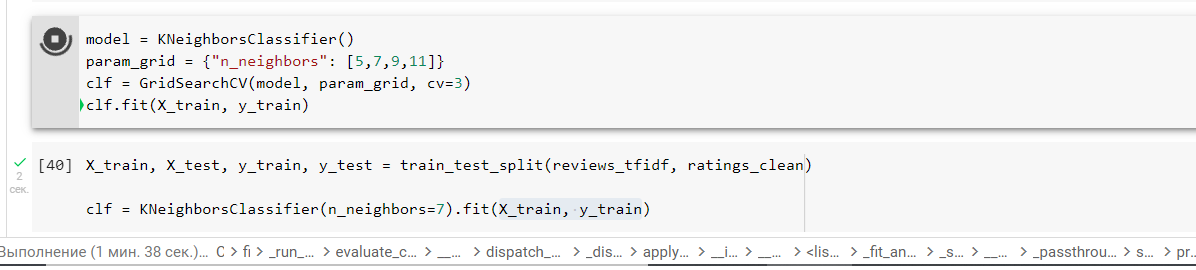

In [44]:
X_train, X_test, y_train, y_test = train_test_split(reviews_tfidf, ratings_clean)

clf = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)

In [45]:
pred = clf.predict(X_test)

In [46]:
acc = accuracy_score(pred, y_test)
micro_f1 = f1_score(pred, y_test, average = 'micro')
micro_p = precision_score(pred, y_test, average = 'micro')
micro_r = recall_score(pred, y_test, average = 'micro')
macro_f1 = f1_score(pred, y_test, average = 'macro')
macro_p = precision_score(pred, y_test, average = 'macro')
macro_r = recall_score(pred, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.5463
micro F1=0.5463, micro P=0.5463, micro R=0.5463
macro F1=0.3434, macro P=0.3389, macro R=0.4059



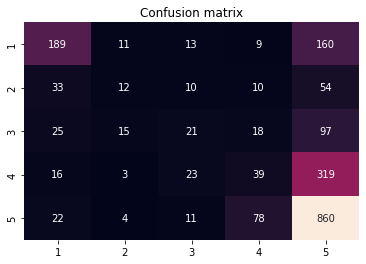

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(data=confusion_matrix(y_test, pred), annot=True, fmt="d", cbar=False, xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
plt.title("Confusion matrix")
plt.show()

КНН тоже не различает ничего больше 1 и меньше 5, все 4-ки относит к 5. Но при этом довольно большому количеству единиц он присвоил оценку 5, что очень плохо!

Давайте теперь обучим дерево

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 4, 6, 8],
    'n_estimators': [100, 200]
}

rf = RandomForestClassifier()

clf = GridSearchCV(rf, param_grid, cv = 3, n_jobs = -1)
clf.fit(reviews_tfidf, ratings_clean)
print(clf.best_estimator_)

Не работает, не обучается, 20 минут уже.... В общем я пытался
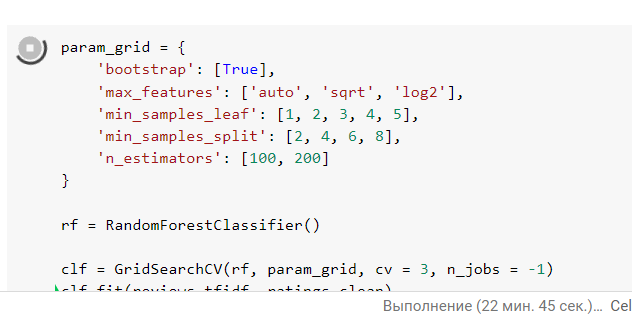

In [69]:
X_train, X_test, y_train, y_test = train_test_split(reviews_tfidf, ratings_clean)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False).fit(X_train, y_train)
pred = clf.predict(X_test)

In [70]:
acc = accuracy_score(pred, y_test)
micro_f1 = f1_score(pred, y_test, average = 'micro')
micro_p = precision_score(pred, y_test, average = 'micro')
micro_r = recall_score(pred, y_test, average = 'micro')
macro_f1 = f1_score(pred, y_test, average = 'macro')
macro_p = precision_score(pred, y_test, average = 'macro')
macro_r = recall_score(pred, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.6511
micro F1=0.6511, micro P=0.6511, micro R=0.6511
macro F1=0.4634, macro P=0.4497, macro R=0.5283



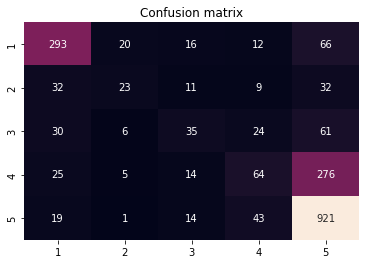

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(data=confusion_matrix(y_test, pred), annot=True, fmt="d", cbar=False, xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
plt.title("Confusion matrix")
plt.show()

Результат средний, лучше КНН и на уровне логистической регрессии. Все прежне описанные тенденции сохраняются

Подводим итоги!

По первой части задания - регрессия на тексте это не очень точно. Особенно плохо, что у рассмотренных нами данных был широкий разброс цен, от нескольких сотен до нескольких тысяч, возможно из-за этого получилась средняя ошибка - 1000. Тф_идф работает лучше чем каунт векторайзер. Жалко, что не получилось построить регрессию на данных без дубликатов описаний. Еще было бы разумно (но не знаю как - научите) оценить вклад векторов от названий и от описаний, понять от чего больше.


По второй части - классификация на тексте чуть лучше)
Но было бы здорово, чтобы классы были равнопредставлены. Так как оценок 2 и 3 было очень мало, то и классификаторы не научились их определять. Большинство отзывов на 4 классификатор относил к 5. Хорошо, что не к 1!
Еще заметил, что у нас есть иерархия классов, наверное, для этого нужен специальный классификатор. То есть 1<2<3<4<5, соответственно было бы правильно больше штрафовать за ошибку между 1 и 5, и меньше штрафовать за ошибку между 3 и 4, интересно,реализовано ли такое в каком-нибудь из классификаторов?